In [25]:
%load_ext autoreload
%autoreload 2

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [27]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [28]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [29]:
from llm_toolkit.logical_reasoning_utils import *

In [30]:
model_name = "Llama3.1-8B-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [31]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   text                                                                   3000 non-null   object
 1   label                                                                  3000 non-null   object
 2   title                                                                  3000 non-null   object
 3   puzzle                                                                 3000 non-null   object
 4   truth                                                                  3000 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf                 3000 non-null   object
 6   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf   3000 non-null   object
 7

In [32]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf']

In [33]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  # Plot accuracy and f1 on the same chart with different markers


epoch                                              model  accuracy  \
0     0.0  shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.fl...  0.707000   
1     0.2  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.709000   
2     0.4  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.716333   
3     0.6  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.699667   
4     0.8  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.771667   
5     1.0  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.780000   
6     1.2  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.731333   
7     1.4  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.751000   
8     1.6  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.739000   
9     1.8  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.723667   
10    2.0  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.729333   

    precision    recall        f1  ratio_valid_classifications  
0    0.763109  0.707000  0.724394                     0.392333  
1    0.798722  0.709000  0.742796                     1.000000  
2    0.805866  0.716333  0.748781                     0.999333  
3    0.802722  0.699667  0.737094                     1.000000  
4    0.809219  0.771667  0.786429                     1.000000  
5    0.810583  0.780000  0.792465                     1.000000  
6    0.815778  0.731333  0.762881                     1.000000  
7    0.812586  0.751000  0.774542                     1.000000  
8    0.809738  0.739000  0.766233                     1.000000  
9    0.814553  0.723667  0.758043                     1.000000  
10   0.815118  0.729333  0.761670                     1.000000

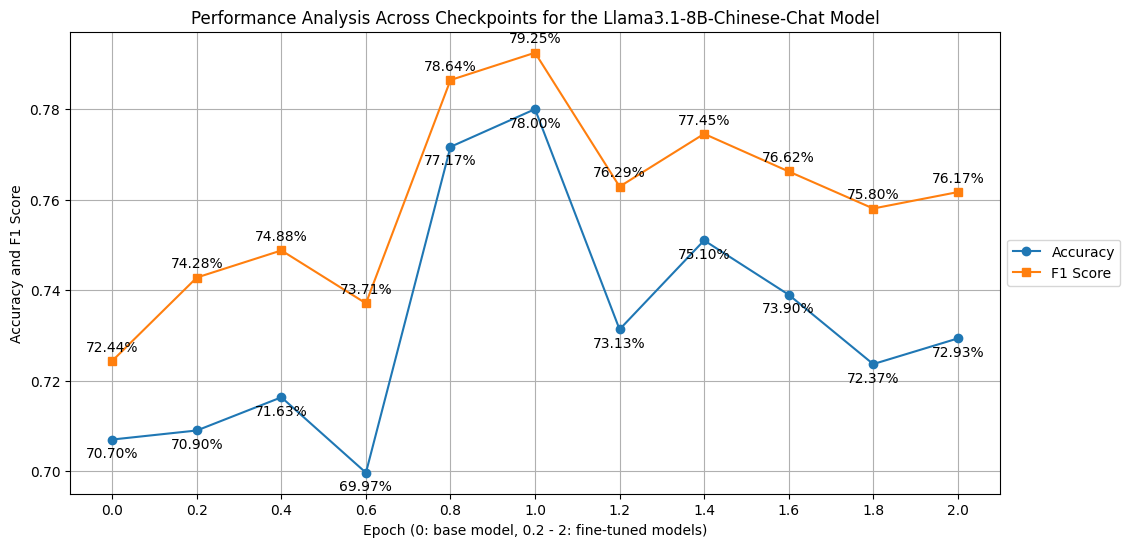

In [34]:
plot_metrics(perf_df, model_name)

In [35]:
perf_df.to_csv(metrics_csv, index=False)

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
不是。         1355
是            495
是。           430
不是           288
回答正确         233
不重要           94
问法错误          67
不是重要          13
不重要。           9
回答正确。          6
不是重要。          4
问法错误。          4
是物品。           1
是小男孩的哭声。       1
Name: count, dtype: int64


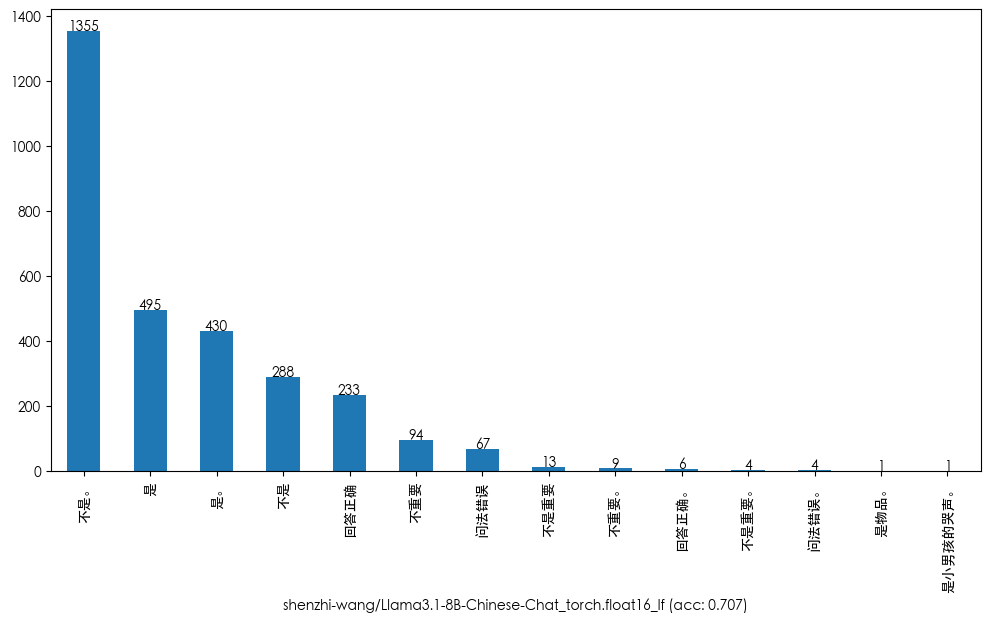

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1245
是       1150
不重要      538
问法错误      38
回答正确      29
Name: count, dtype: int64


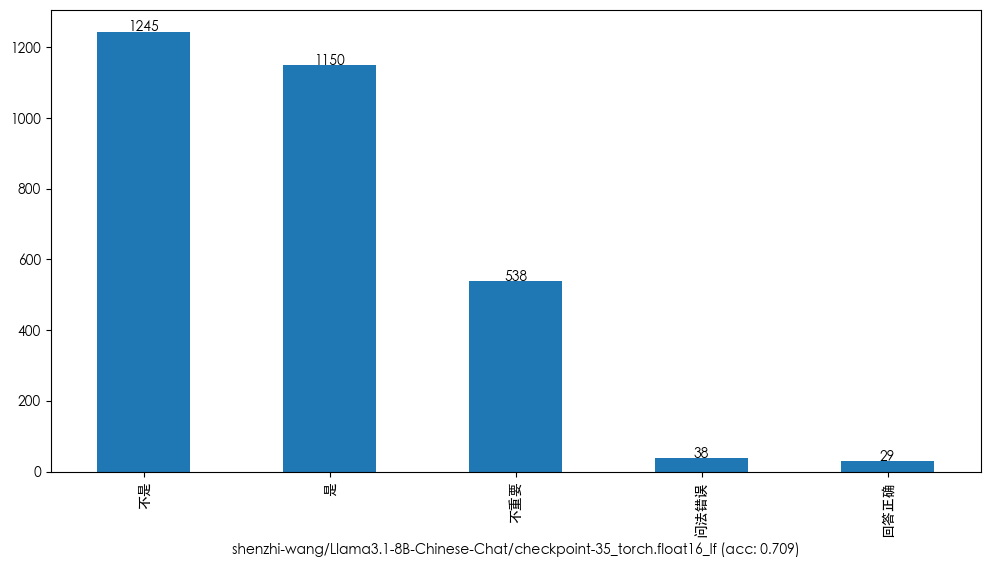

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
不是              1227
是               1185
不重要              544
回答正确              26
问法错误              16
小男孩                1
破旧帽子是小男孩的爷爷的       1
Name: count, dtype: int64


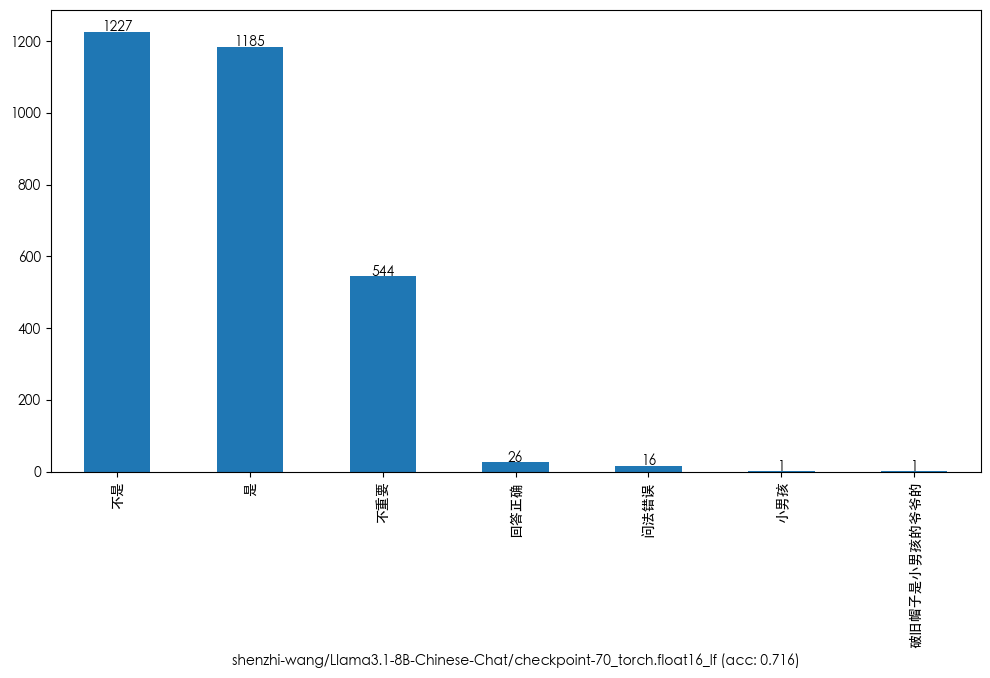

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1206
是       1124
不重要      602
回答正确      36
问法错误      32
Name: count, dtype: int64


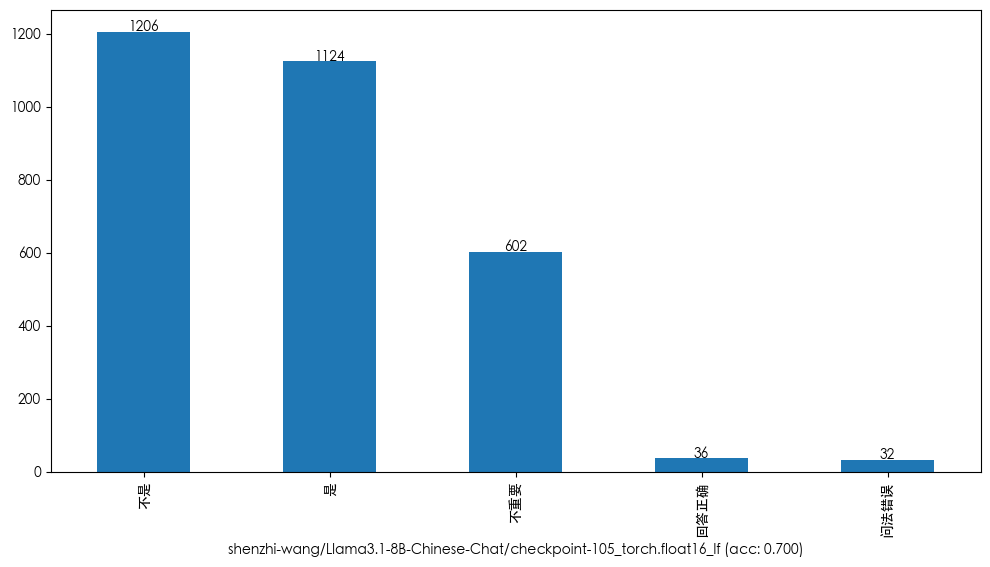

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1458
是       1131
不重要      315
问法错误      59
回答正确      37
Name: count, dtype: int64


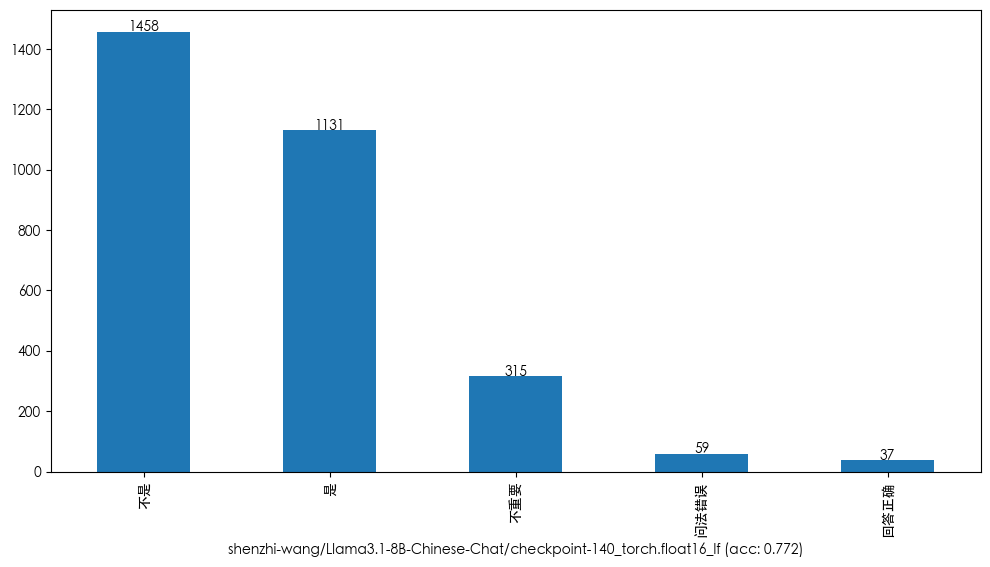

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1483
是       1150
不重要      287
问法错误      49
回答正确      31
Name: count, dtype: int64


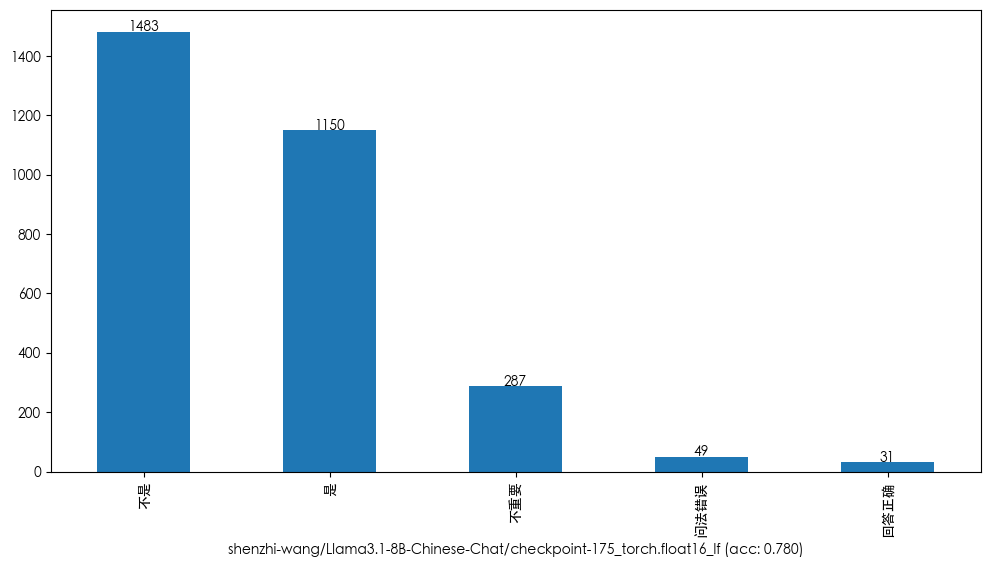

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-210_torch.float16_lf
不是      1260
是       1141
不重要      482
问法错误      83
回答正确      34
Name: count, dtype: int64


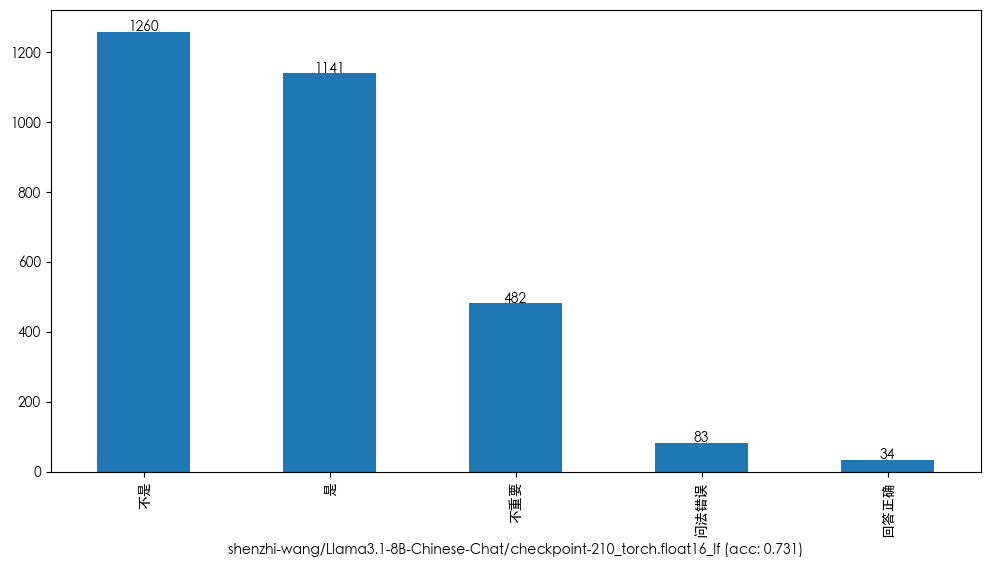

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-245_torch.float16_lf
不是      1348
是       1161
不重要      431
问法错误      31
回答正确      29
Name: count, dtype: int64


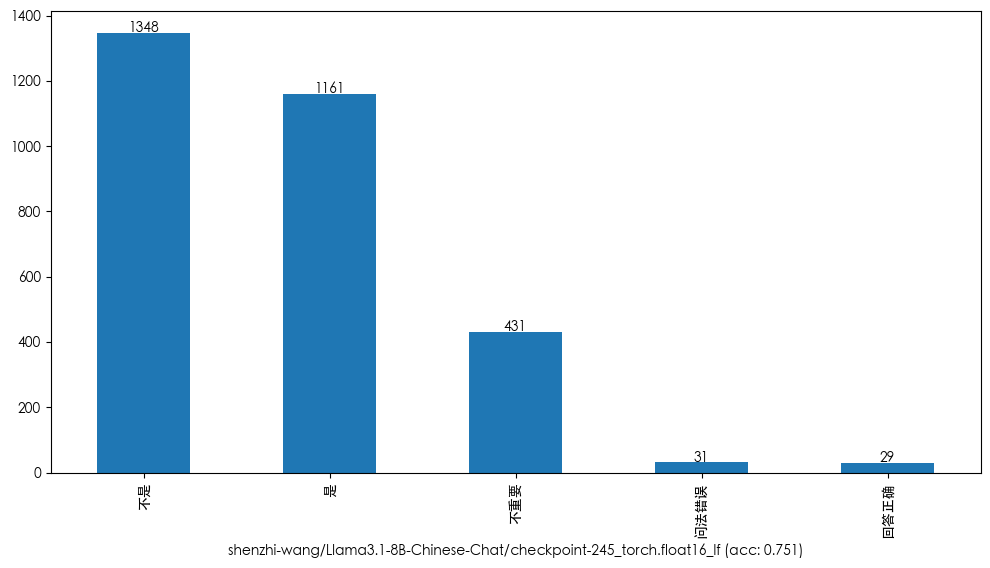

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-280_torch.float16_lf
不是      1359
是       1103
不重要      459
问法错误      47
回答正确      32
Name: count, dtype: int64


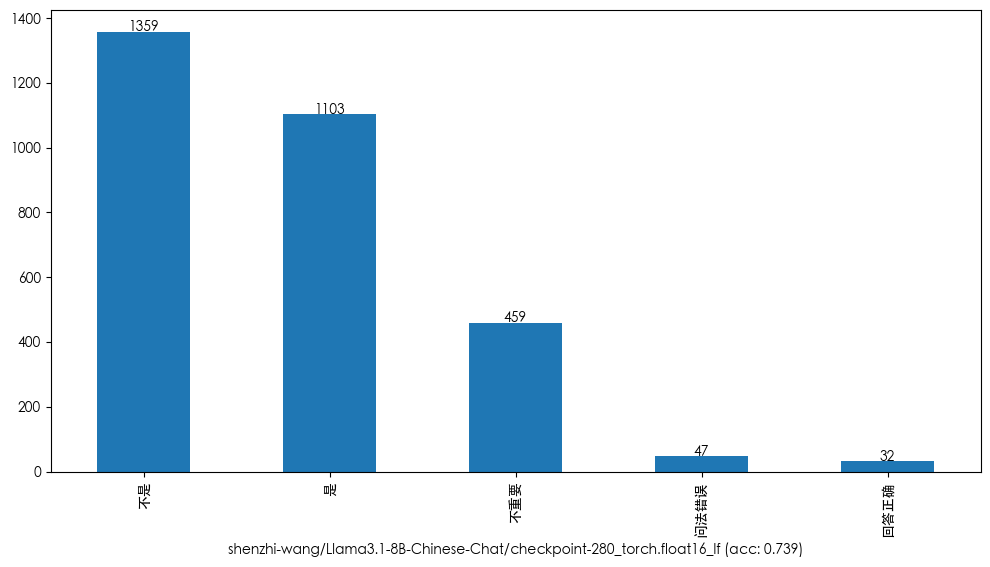

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-315_torch.float16_lf
不是      1302
是       1079
不重要      538
问法错误      46
回答正确      35
Name: count, dtype: int64


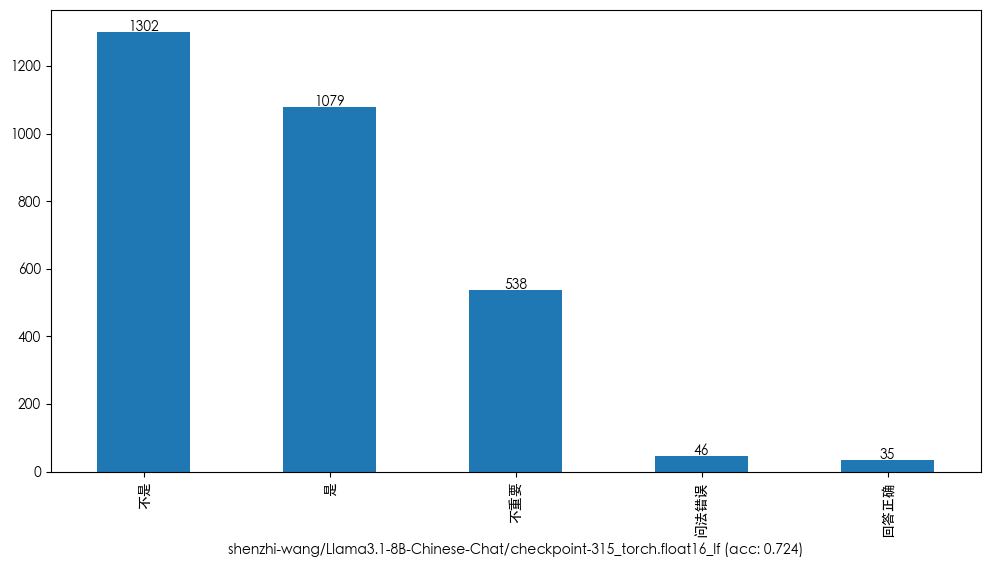

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-350_torch.float16_lf
不是      1309
是       1091
不重要      522
问法错误      43
回答正确      35
Name: count, dtype: int64


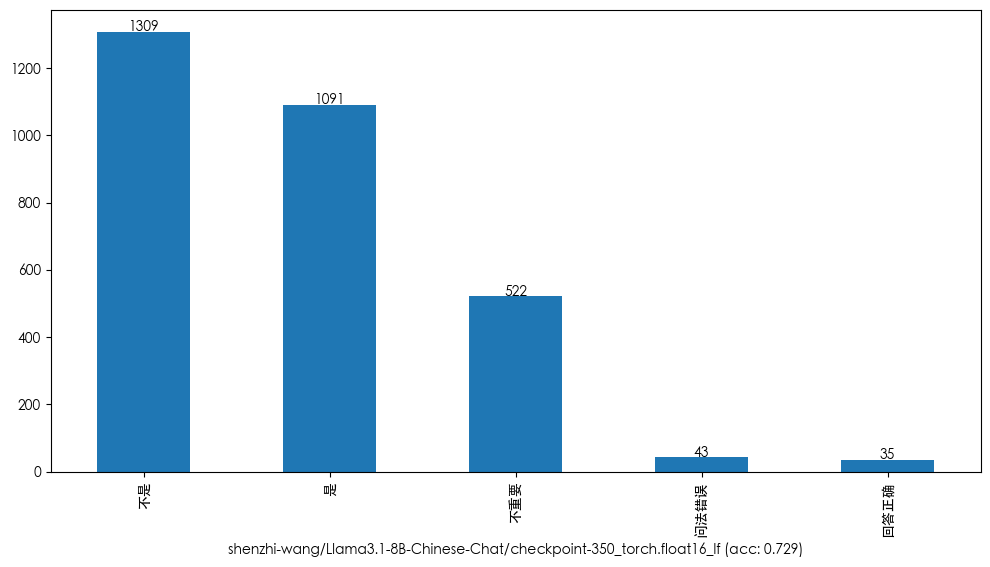

In [37]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")